In [8]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
mf0 = []
with open("./mf_results_0.pkl", "rb") as file:
    mf0 = pickle.load(file)
    
mf1 = []
with open("./mf_results_1.pkl", "rb") as file:
    mf1 = pickle.load(file)
    
mf2 = []
with open("./mf_results_2.pkl", "rb") as file:
    mf2 = pickle.load(file)
    
mf3 = []
with open("./mf_results_3.pkl", "rb") as file:
    mf3 = pickle.load(file)

In [96]:
mf1[0].keys()

dict_keys(['fold', 'K', 'lr', 'rf', 'Training time', 'U', 'V', 'rmse_history', 'test_rmse', 'r2_score'])

In [55]:
mf3[0]['Training time']

'2:01:31.459'

In [97]:
def print_mf(mff):

    print(f"K = {mff[0]['K']}")
    print(f"learning rate = {mff[0]['lr']}")
    print(f"regularization factor = {mff[0]['rf']}")
   # print(f"maximum iteration = {mff[0]['max_iter']}\n")

    avg_test_rmse = 0
    avg_r2_score = 0
    avg_rmse_history = np.zeros(np.array(mff[0]['rmse_history']).shape)
    for mf in mff:
        avg_test_rmse += mf['test_rmse']
        avg_r2_score += mf['r2_score']
        avg_rmse_history += np.array(mf['rmse_history'])
        print(f"Fold : {mf['fold']}")
        print(f"Training time={mf['Training time']}")
        print(f"test rmse = {mf['test_rmse']}")
        print(f"r2 score = {mf['r2_score']}\n")


    avg_test_rmse /= 5
    avg_r2_score /= 5
    avg_rmse_history /= 5


    print(f"Average test rmse = {round(avg_test_rmse, 3)}")
    print(f"Average r2 score = {round(avg_r2_score, 3)}")
    return avg_rmse_history

In [124]:
avg0 = print_mf(mf0)

K = 10
learning rate = 0.001
regularization factor = 0.01
Fold : 0
Training time=1 day, 13:36:57.304
test rmse = 0.8912812410537811
r2 score = 0.36641655668913653

Average test rmse = 0.178
Average r2 score = 0.073


In [98]:
avg1 = print_mf(mf1)

K = 10
learning rate = 0.01
regularization factor = 0.1
Fold : 0
Training time=0:23:35.936
test rmse = 0.8841634034847385
r2 score = 0.37649583639386397

Fold : 1
Training time=0:24:52.391
test rmse = 0.8804205398247968
r2 score = 0.3764867099708773

Fold : 2
Training time=0:25:17.791
test rmse = 0.8794080936917983
r2 score = 0.37928763868000814

Fold : 3
Training time=0:24:48.837
test rmse = 0.8813095195291089
r2 score = 0.37869102241632346

Fold : 4
Training time=0:26:02.723
test rmse = 0.880987144330939
r2 score = 0.37736622065167647

Average test rmse = 0.881
Average r2 score = 0.378


In [101]:
avg2 = print_mf(mf2)

K = 10
learning rate = 0.007
regularization factor = 0.01
Fold : 0
Training time=0:24:26.344
test rmse = 0.9057730707402045
r2 score = 0.34564549420611423

Fold : 1
Training time=0:24:14.980
test rmse = 0.9035612619505062
r2 score = 0.34327947538130055

Fold : 2
Training time=0:24:39.726
test rmse = 0.9036795138370706
r2 score = 0.34455183533674594

Fold : 3
Training time=0:24:37.971
test rmse = 0.9037834587362076
r2 score = 0.3465994682594673

Fold : 4
Training time=0:24:52.763
test rmse = 0.9036611305235147
r2 score = 0.3449043120484263

Average test rmse = 0.904
Average r2 score = 0.345


In [102]:
avg3 = print_mf(mf3)

K = 10
learning rate = 0.0045
regularization factor = 0.01
Fold : 0
Training time=2:01:31.459
test rmse = 0.893120519367731
r2 score = 0.3637988897901919

Fold : 1
Training time=2:19:40.795
test rmse = 0.8940748753335498
r2 score = 0.35699675505429795

Fold : 2
Training time=1:54:19.398
test rmse = 0.8909092896545194
r2 score = 0.36294569856495773

Fold : 3
Training time=1:54:38.892
test rmse = 0.8910191675703366
r2 score = 0.3649253173208914

Fold : 4
Training time=1:48:17.004
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Average test rmse = 0.892
Average r2 score = 0.362


In [104]:
raw = (np.random.random(1000) - 0.5).cumsum()
smooth = raw.reshape(-1,10).mean(axis=1)

In [156]:
avg3_smooth = avg3.reshape(-1, 5).mean(axis=1)
avg3_smooth.shape

(100,)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


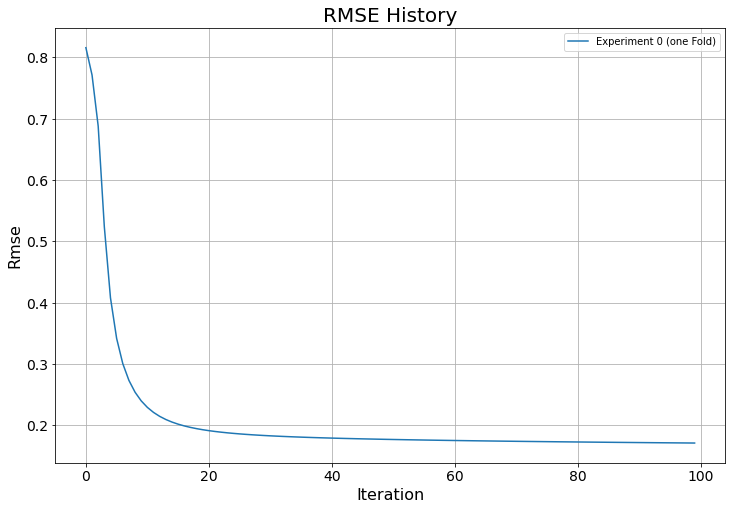

In [168]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.grid(True)


df = pd.DataFrame({'Experiment 0 (one Fold)': avg0[:100]})

sns.lineplot(ci=None, data=df, ax=ax1)

ax1.set_title("RMSE History", fontdict= {'fontsize': 20})

#ax1.set_yscale("log")
#ticks = [0.7, .75, .8, .85, .9, 1, 2]
#ax1.set_yticks(ticks)
#ax1.set_yticklabels(ticks, fontdict={'fontsize': 11})
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Iteration", fontdict={'fontsize': 16})
ax1.set_ylabel("Rmse", fontdict={'fontsize': 16})

fig.savefig('MF0_rmse_history.eps', format='eps')
plt.show()

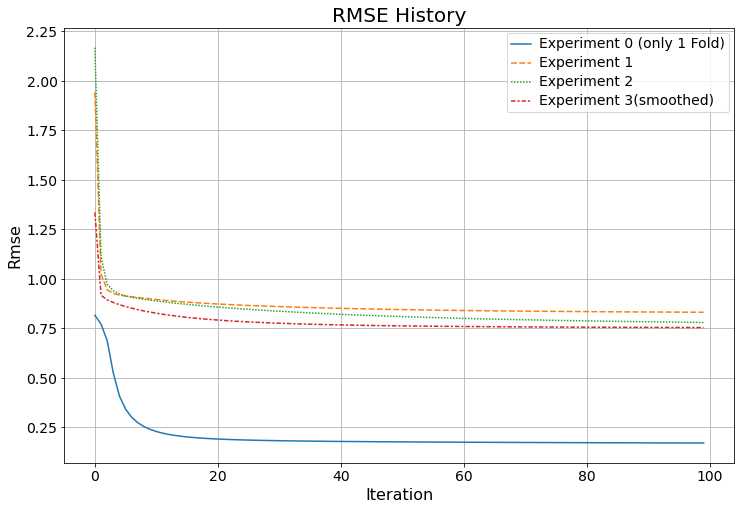

In [192]:
    
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.grid(True)


df = pd.DataFrame({'Experiment 0 (only 1 Fold)': avg0[:100], 'Experiment 1': avg1[:], 'Experiment 2': avg2[:], 'Experiment 3(smoothed)': avg3_smooth[:]})

sns.lineplot(data=df, ax=ax1)

ax1.set_title("RMSE History", fontdict={'fontsize': 20})

#ax1.set_yscale("log")
#ticks = [0.7, .75, .8, .85, .9, 1, 2]
#ax1.set_yticks(ticks)
#ax1.set_yticklabels(ticks, fontdict={'fontsize': 14})
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Iteration", fontdict= {'fontsize': 16})
ax1.set_ylabel("Rmse", fontdict= {'fontsize': 16})
plt.setp(ax1.get_legend().get_texts(), fontsize='14') # for legend text

fig.savefig('MF_rmse_history.png', format='png')
plt.show()

In [181]:
uv0 = []
with open("./decomp_results_d10_k4.pkl", "rb") as file:
    uv0 = pickle.load(file)
    
uv1 = []
with open("./decomp_results_d15_k4.pkl", "rb") as file:
    uv1 = pickle.load(file)
    
    
print(uv0[0].keys())
print(uv1[0].keys())

dict_keys(['fold', 'Decomposition_time_U', 'Decomposition_time_V', 'Optimization_time', 'U', 'V', 'optim_rmse_history', 'test_rmse', 'r2_score'])
dict_keys(['fold', 'd', 'threshold', 'Decomposition_time_U', 'Decomposition_time_V', 'Optimization_time', 'U', 'V', 'optim_rmse_history', 'test_rmse', 'r2_score'])


In [185]:
def print_uv(uvv):
    #print(f"d = {uvv[0]['d']}")
    #print(f"threshold = {uvv[0]['threshold']}")

    avg_test_rmse = 0
    avg_r2_score = 0
    avg_rmse_history = np.zeros(np.array(uvv[0]['optim_rmse_history']).shape)
    for uv in uvv:
        avg_test_rmse += uv['test_rmse']
        avg_r2_score += uv['r2_score']
        avg_rmse_history += np.array(uv['optim_rmse_history'])
        print(f"Fold : {uv['fold']}")
        print(f"Decomposition_time_U={uv['Decomposition_time_U']}")
        print(f"Decomposition_time_V={uv['Decomposition_time_V']}")
        print(f"Optimization_time={uv['Optimization_time']}")
        print(f"test rmse = {mf['test_rmse']}")
        print(f"r2 score = {mf['r2_score']}\n")


    avg_test_rmse /= 5
    avg_r2_score /= 5
    avg_rmse_history /= 5


    print(f"Average test rmse = {round(avg_test_rmse, 3)}")
    print(f"Average r2 score = {round(avg_r2_score, 3)}")
    return avg_rmse_history

In [190]:
avg_uv0 = print_uv(uv0)

Fold : 0
Decomposition_time_U=0:15:36.373
Decomposition_time_V=0:10:21.555
Optimization_time=1:47:59.609
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Fold : 1
Decomposition_time_U=0:15:33.521
Decomposition_time_V=0:10:21.053
Optimization_time=1:43:42.094
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Fold : 2
Decomposition_time_U=0:15:30.959
Decomposition_time_V=0:10:19.095
Optimization_time=1:43:39.203
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Fold : 3
Decomposition_time_U=0:15:32.804
Decomposition_time_V=0:10:20.207
Optimization_time=1:43:34.404
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Fold : 4
Decomposition_time_U=0:15:31.681
Decomposition_time_V=-1 day, 23:10:19.185
Optimization_time=0:43:30.874
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Average test rmse = 1.053
Average r2 score = 0.105


In [188]:
avg_uv1 = print_uv(uv1)

Fold : 0
Decomposition_time_U=0:28:19.020
Decomposition_time_V=0:19:06.574
Optimization_time=3:09:26.899
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Fold : 1
Decomposition_time_U=0:23:35.875
Decomposition_time_V=0:16:15.009
Optimization_time=2:51:46.609
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Fold : 2
Decomposition_time_U=0:26:37.531
Decomposition_time_V=0:15:29.182
Optimization_time=3:03:41.209
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Fold : 3
Decomposition_time_U=0:23:14.714
Decomposition_time_V=0:15:28.419
Optimization_time=2:34:57.234
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Fold : 4
Decomposition_time_U=0:23:23.930
Decomposition_time_V=0:15:33.540
Optimization_time=2:36:02.804
test rmse = 0.891899562502543
r2 score = 0.3618460847404745

Average test rmse = 1.02
Average r2 score = 0.167


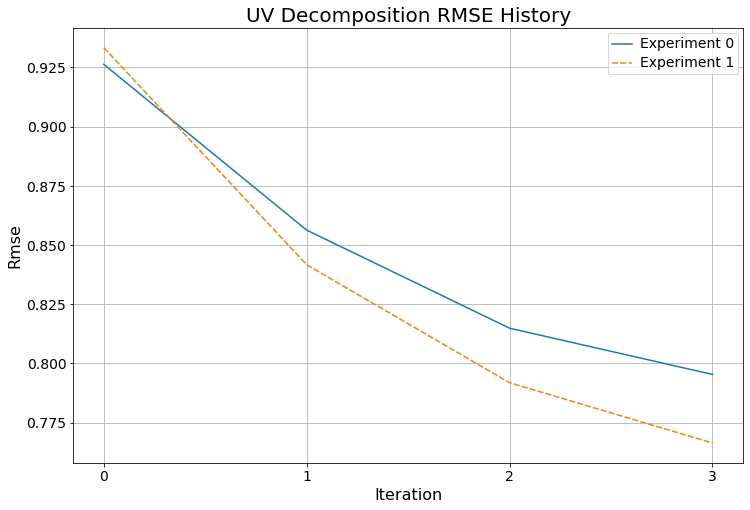

In [195]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.grid(True)


df = pd.DataFrame({'Experiment 0': avg_uv0, 'Experiment 1': avg_uv1})

sns.lineplot(data=df, ax=ax1)

ax1.set_title("UV Decomposition RMSE History", fontdict={'fontsize': 20})

#ax1.set_yscale("log")
ticks = [0, 1, 2, 3]
ax1.set_xticks(ticks)
#ax1.set_yticklabels(ticks, fontdict={'fontsize': 14})
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Iteration", fontdict= {'fontsize': 16})
ax1.set_ylabel("Rmse", fontdict= {'fontsize': 16})
plt.setp(ax1.get_legend().get_texts(), fontsize='14') # for legend text

fig.savefig('UV_rmse_history.png', format='png')
plt.show()